# 2110433 - Computer Vision (2024/2)
## Lab 7- Simple Object Recognition
In this lab, we will learn to use useful  handcrafted features to recognize objects in the provied images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

<b>Collaboration is encouraged in this course.</b> You must turn in <b>your own write ups</b> of all problems. If you collaborate with others, you must put the names and ids of the students you worked with in below block.

Collaboration List:
- ...
- ...

In [15]:
import cv2
import math
import numpy as np
import random as rng
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display, HTML,clear_output
%matplotlib inline

## Maker Based Segmentation

In this section, we will learn how to apply a classic segmentation algorithm named <b>watershed</b>. This algorithm can be used to detect and extract objects in images that are <b>touching and/or overlapping</b> (like RBC in previous Lab!).

Assume that we want to build an application to count coins value from the following image. First of all, we need to segment each coins in to a individual connected component.

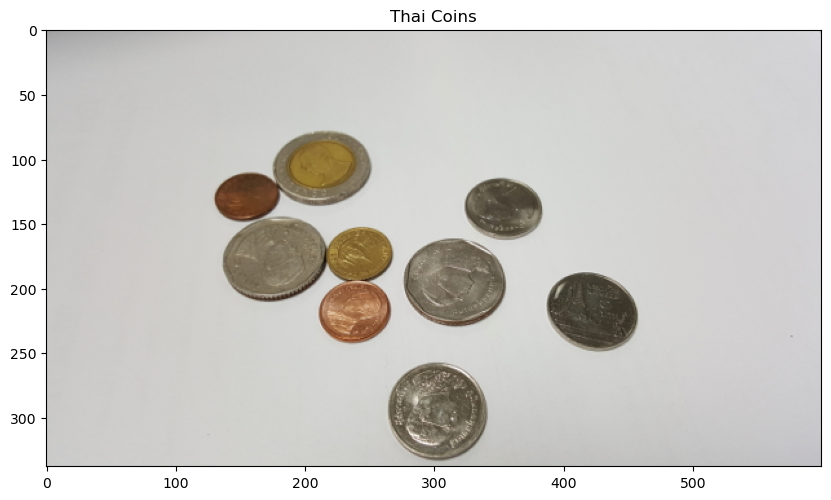

In [16]:
sampleCoinImage = cv2.imread("assets/Lab7-SampleCoins.jpg")
sampleCoinGray = cv2.cvtColor(sampleCoinImage,cv2.COLOR_BGR2GRAY)
tempImage = cv2.cvtColor(sampleCoinImage,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title("Thai Coins")
plt.imshow(tempImage)
plt.show()

The following blocks try to use edge information from previous lecture to seperate coins image into individual coin.
Standard Sobel operator is used to extract edge information and only strong edge pixels are kept based on defined threshold. Try to adjust the edge threshold value to seperate each coin from others

In [17]:
def extractSobelEdge(thresholdEdgeVal):
    sampleCoinGrayBlur = cv2.blur(sampleCoinGray,(15,15))
    sobelX = np.uint8(np.absolute(cv2.Sobel(sampleCoinGrayBlur,cv2.CV_64F,1,0,ksize=3)))
    sobelY = np.uint8(np.absolute(cv2.Sobel(sampleCoinGrayBlur,cv2.CV_64F,0,1,ksize=3)))
    sobelXY = (sobelX + sobelY) > thresholdEdgeVal
    plt.figure(figsize=(10,10))
    plt.title("Edge Image")
    plt.imshow(sobelXY,cmap='gray')
    plt.show()
interact(extractSobelEdge, thresholdEdgeVal=widgets.IntSlider(min=0,max=255,step=1,value=1));

interactive(children=(IntSlider(value=1, description='thresholdEdgeVal', max=255), Output()), _dom_classes=('w…

You can see from the above threshold edge map, even we selects a precise edge threshold, we cannot segment connected coins into individual one. In order to use watershed algorithm, markers muse be place at the corresponded location of the objects in our image. The markers can be either manual define or calculate from various image processing techniques. We will start from using <a href="https://docs.opencv.org/3.4.2/d7/d4d/tutorial_py_thresholding.html">automatic Otsu thesholding</a>.

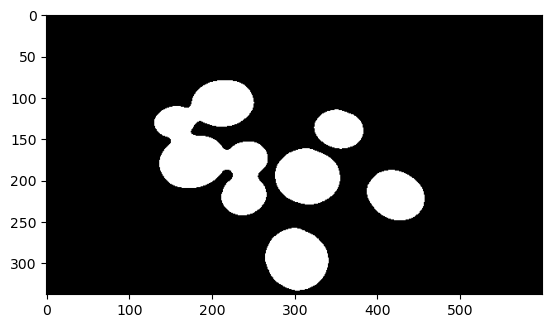

In [18]:
sampleCoinGrayBlur = cv2.medianBlur(sampleCoinGray, 13)
_,thresholdCoinImage = cv2.threshold(sampleCoinGrayBlur,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(thresholdCoinImage, cmap='gray')
plt.show()

This image gray levels can be visualized as follows

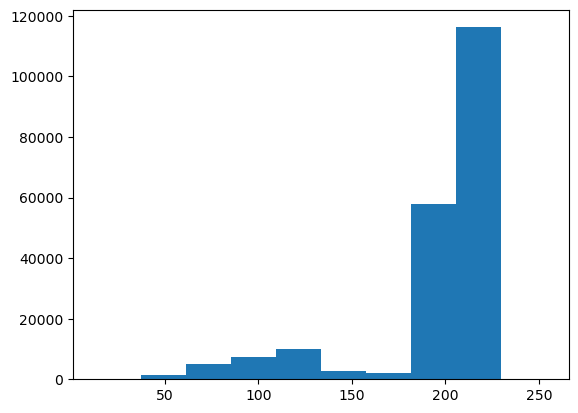

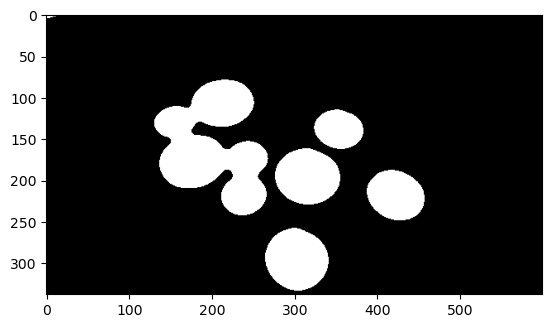

In [19]:
plt.hist(sampleCoinGray.flatten())
plt.show()

plt.imshow(sampleCoinGrayBlur <165, cmap='gray') # we can manually select a proper theshold value to sperate between background and foreground
plt.show()

We then apply <a href="https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga8a0b7fdfcb7a13dde018988ba3a43042">distance transform</a> to the thresholding output. Distance transform calculates the approximate or precise distance from every binary image pixel to the nearest zero pixel

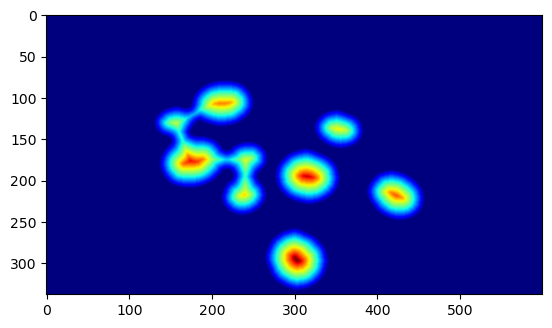

In [20]:
distanceTransformOutput = cv2.distanceTransform(thresholdCoinImage,cv2.DIST_L2, 3)
plt.imshow(distanceTransformOutput,cmap='jet')
plt.show()

Pick only pixel which is greater than 45% of max distance as potential coin markers.

Max Distance: 35.187332


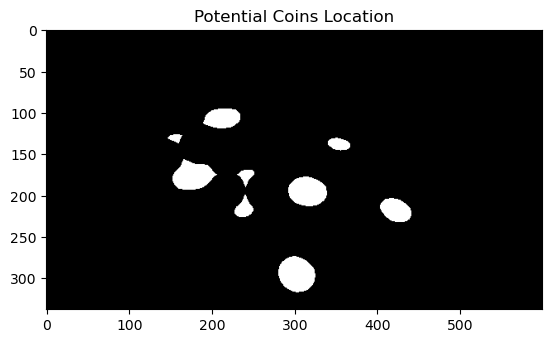

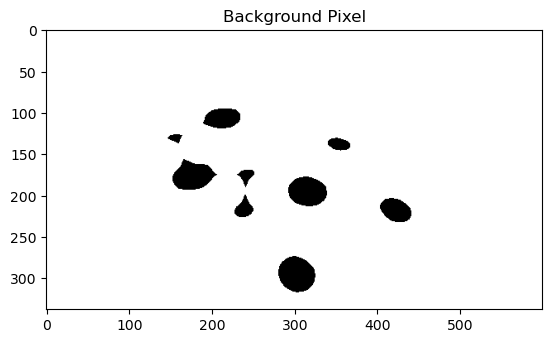

In [21]:
maxDistance = np.max(distanceTransformOutput)
print('Max Distance:',maxDistance)
roughMarkerPixel = np.uint8(distanceTransformOutput > 0.45 * maxDistance)
backgroundMask = np.invert(roughMarkerPixel)
plt.title('Potential Coins Location')
plt.imshow(roughMarkerPixel, cmap='gray')
plt.show()

plt.figure()
plt.title('Background Pixel')
plt.imshow(backgroundMask, cmap='gray')
plt.show()

Labeling each connected component with its unique label number by using <a href="https://docs.opencv.org/3.4.2/d3/dc0/group__imgproc__shape.html#gaedef8c7340499ca391d459122e51bef5">cv2.connectedComponents</a>.

Computes the connected components labeled image of boolean image
image with 4 or 8 way connectivity - returns N, the total number of labels [0, N-1] where 0 represents the background label

Min Label: 0 Max Label: 9


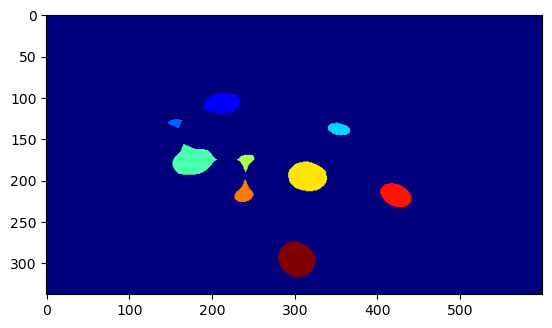

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
_, seed = cv2.connectedComponents(roughMarkerPixel)
print('Min Label:',np.min(seed),'Max Label:',np.max(seed))
plt.imshow(seed,cmap='jet')
plt.show()
print(seed)

Apply <a href="https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga3267243e4d3f95165d55a618c65ac6e1">watershed algorithm</a> using created marker and input coins image. Is there any missing coin? Why? Fix the bug and state your instruction in below block.

Min Label: -1 Max Label: 9


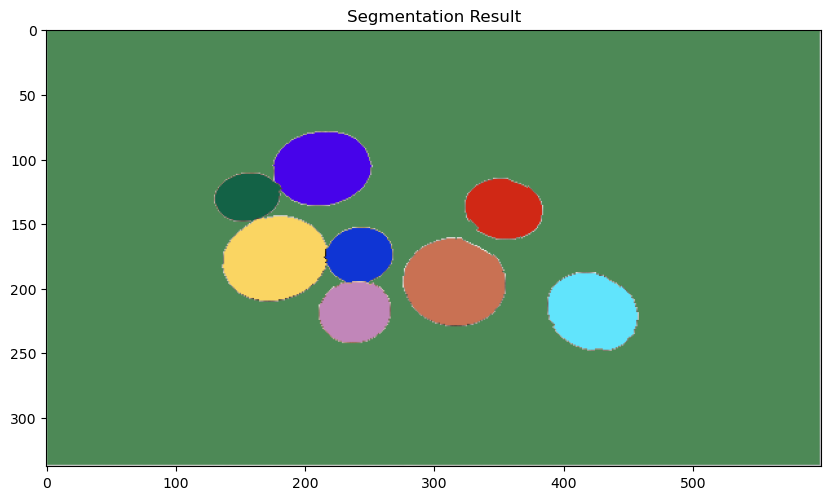

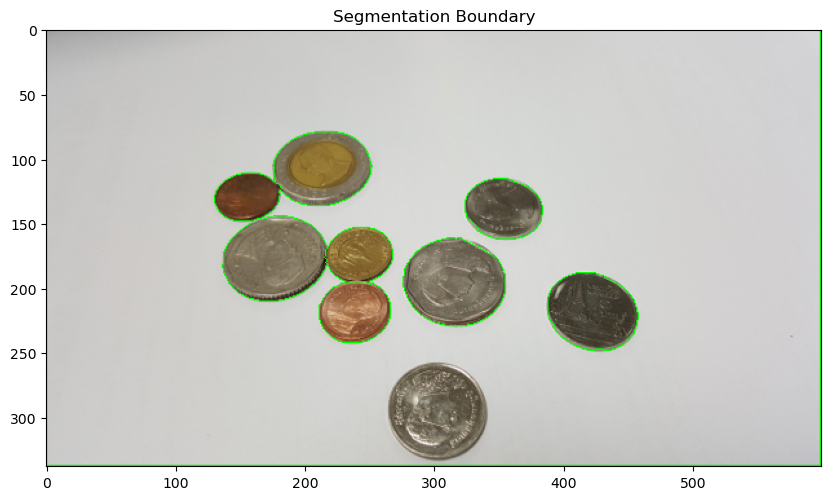

In [23]:
outputImage = sampleCoinImage.copy()
borderImage = sampleCoinImage.copy()
outputMarkers = cv2.watershed(outputImage,seed) ### Warning seed will get modified here!!
# -1 is border pixel  
print('Min Label:',np.min(outputMarkers),'Max Label:',np.max(outputMarkers))

# 1 is background 
for outputMarkerIdx in range(1,np.max(outputMarkers+1)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    outputImage[np.where(outputMarkers == outputMarkerIdx)] = color
outputImage = cv2.cvtColor(outputImage,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.title('Segmentation Result')
plt.imshow(outputImage)
plt.show()

borderImage[np.where(outputMarkers == -1)] = (0,255,0)
borderImage = cv2.cvtColor(borderImage,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title('Segmentation Boundary')
plt.imshow(borderImage)
plt.show()

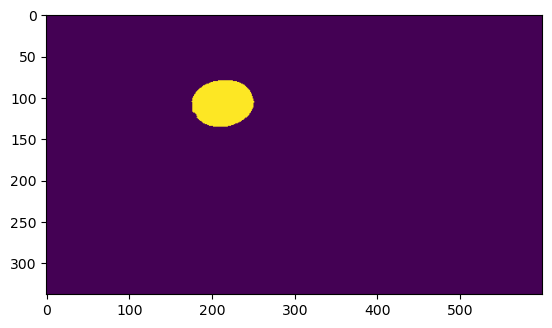

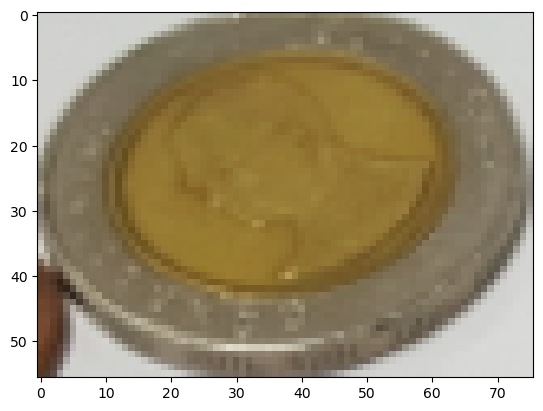

In [24]:
### Crop out individual coin
firstCointMask = outputMarkers == 1
plt.imshow(firstCointMask)
plt.show()

contour, _ = cv2.findContours(firstCointMask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

x,y,w,h = cv2.boundingRect(contour[0])

cropCoinBGR = sampleCoinImage[y:y+h,x:x+w,:]
cropCoinRGB = cv2.cvtColor(cropCoinBGR, cv2.COLOR_BGR2RGB)
plt.imshow(cropCoinRGB)
plt.show()

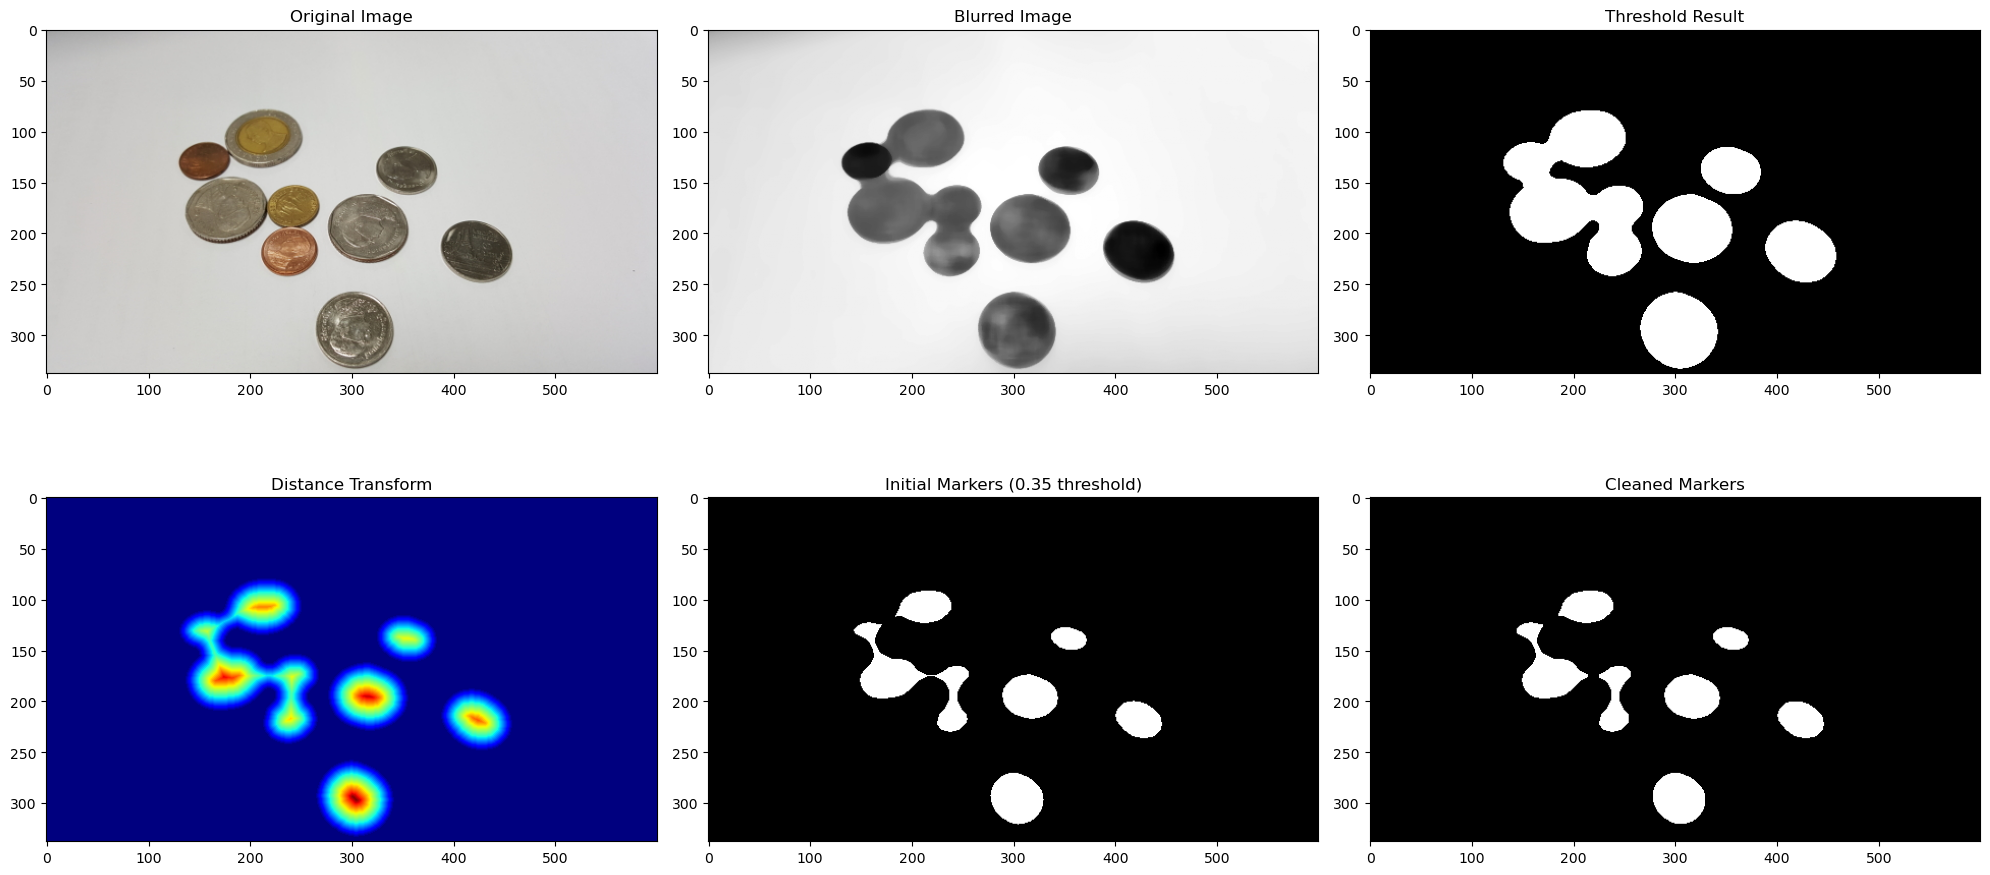

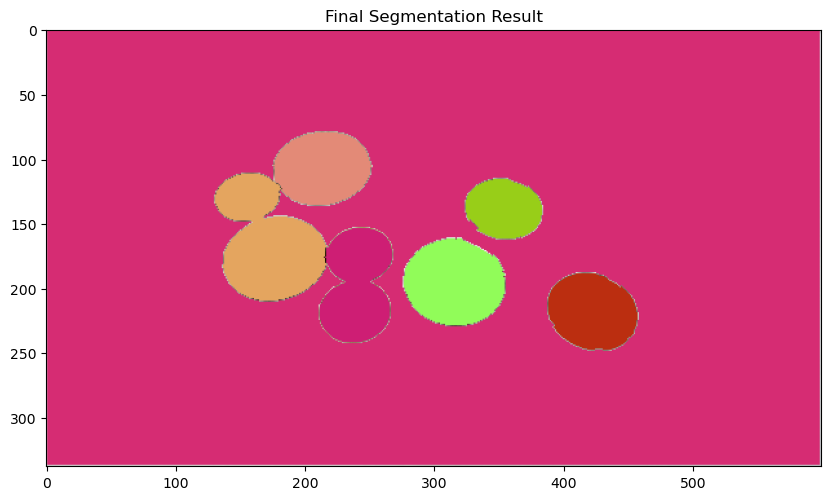

In [31]:
'''
How to find the missing coin?

'''

# Improved preprocessing and visualization
import matplotlib.pyplot as plt

# 1. Improved blurring
sampleCoinGrayBlur = cv2.medianBlur(sampleCoinGray, 15)

# 2. Initial thresholding
_, thresholdCoinImage = cv2.threshold(sampleCoinGrayBlur, 0, 255, 
                                    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 3. Distance transform
distanceTransformOutput = cv2.distanceTransform(thresholdCoinImage, cv2.DIST_L2, 3)

# 4. Generate markers with lower threshold
maxDistance = np.max(distanceTransformOutput)
roughMarkerPixel = np.uint8(distanceTransformOutput > 0.35 * maxDistance)

# 5. Clean up markers
kernel = np.ones((3,3), np.uint8)
cleanedMarkers = cv2.morphologyEx(roughMarkerPixel, cv2.MORPH_OPEN, kernel)
cleanedMarkers = cv2.morphologyEx(cleanedMarkers, cv2.MORPH_CLOSE, kernel)

# 6. Get connected components
_, seed = cv2.connectedComponents(cleanedMarkers)

# Visualization
plt.figure(figsize=(20, 10))

# Original image
plt.subplot(231)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(sampleCoinImage, cv2.COLOR_BGR2RGB))

# Blurred image
plt.subplot(232)
plt.title('Blurred Image')
plt.imshow(sampleCoinGrayBlur, cmap='gray')

# Threshold result
plt.subplot(233)
plt.title('Threshold Result')
plt.imshow(thresholdCoinImage, cmap='gray')

# Distance transform
plt.subplot(234)
plt.title('Distance Transform')
plt.imshow(distanceTransformOutput, cmap='jet')

# Markers before cleanup
plt.subplot(235)
plt.title('Initial Markers (0.35 threshold)')
plt.imshow(roughMarkerPixel, cmap='gray')

# Final cleaned markers
plt.subplot(236)
plt.title('Cleaned Markers')
plt.imshow(cleanedMarkers, cmap='gray')

plt.tight_layout()
plt.show()

# Show final watershed result
outputImage = sampleCoinImage.copy()
outputMarkers = cv2.watershed(outputImage, seed)

# Visualize final segmentation
plt.figure(figsize=(10, 10))
plt.title('Final Segmentation Result')
for label in range(1, np.max(outputMarkers) + 1):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    outputImage[outputMarkers == label] = color
plt.imshow(cv2.cvtColor(outputImage, cv2.COLOR_BGR2RGB))
plt.show()

### Assignment 1 - Coin Counter

From the above section, we can gracefully segment overlpping coins! Your today task is to implement a program to count total coin value from test images provided in assets folder. Please include one of your own test image by using smartphone camera. The images should show robustness of your designed alogorithm such as overlapping coins, tilt camera angle or shadow handling. Don't forget to show your work in step in below block. <br>(Optional) You will get extra points if you can use <b>same parameters</b> for all test images. :)

<b>Remark : </b>
- There are four test images in assets folder. Please hand in the recognition result in image files. 
- You should not count outlier object (key)!!!

<b>Basic Guidance:<b>
1. Segment each coin into individual connected component and find the bounding box which can enclose those connect components by <a href="https://docs.opencv.org/3.4.2/d3/dc0/group__imgproc__shape.html#gacb413ddce8e48ff3ca61ed7cf626a366">cv2.boundingRect</a>
2. For each component, extract <b>useful features</b> (you have to design this by youself).
3. Classify those components into Thai Coin classes.  

<b>Hints:</b>
- How do to discard noise/fill small hole from segmentation mask output? (Previous Lab?)
- Smoothing input image before apply thresholding by using <a href="https://docs.opencv.org/4.5.1/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37">cv2.blur</a>, <a href="https://docs.opencv.org/4.5.1/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9">cv2.medianFilter</a> or <a href="https://docs.opencv.org/4.5.1/d4/d86/group__imgproc__filter.html#ga9fabdce9543bd602445f5db3827e4cc0">cv2.pyrMeanShiftFiltering</a> might be able to improve threshold result.
- From the beginning of this class, you had learned many potential image features, such as edge, color, contour and shape. Use them wisely.
- Internet is your friend. You can search for relavent research papers and use their algorithm, but you must <b>give proper credits</b> by citing them in this notebook. 

In [ ]:
### Describe how your algorithm work here (Thai or English). You can provide any visualization if you want.
'''
1. ..
2. ..
..
'''

"\n1. Image Preprocessing\n\nGrayscale Conversion: Converts the color image to grayscale to simplify processing\nNoise Reduction: Applies median blur (kernel size 15) to reduce noise while preserving edges\nThresholding: Uses Otsu's method to automatically separate coins from the background\n"

1. Image Preprocessing

- Grayscale Conversion: Converts the color image to grayscale to simplify processing
- Noise Reduction: Applies median blur (kernel size 15) to reduce noise while preserving edges
- Thresholding: Uses Otsu's method to automatically separate coins from the background

2. Marker-Based Segmentation

- Distance Transform: Calculates the distance from each foreground pixel to the nearest background pixel
- Marker Generation: Thresholds the distance transform at 40% of maximum distance to create initial markers
- Marker Cleanup: Applies morphological operations (opening and closing) to improve marker quality
- Watershed Algorithm: Uses OpenCV's watershed algorithm to segment overlapping coins

3. Feature Extraction
For each segmented coin region:

- Size Features: Radius and area calculated from contours
- Shape Analysis: Circularity (4π×area/perimeter²) to identify and exclude non-coin objects like keys
- Color Analysis: Extracts mean HSV color values within coin regions
- Bimetallic Detection: Analyzes inner vs. outer regions to detect two-colored coins (10 Baht)

4. Coin Classification

- Clustering: Uses K-means to cluster coins by radius (primary feature)
- Size-Based Classification: Maps clusters to coin denominations (smaller to larger)
- Color Refinement: Uses color information to differentiate similar-sized coins:

    - Copper/bronze: 25 Satang
    - Silver: 50 Satang, 1 Baht, 5 Baht
    - Gold/yellow: 2 Baht
    - Bimetallic: 10 Baht

5. Non-Coin Object Filtering

- Circularity Threshold: Objects with circularity < 0.7 are excluded (like keys)
- Size Filtering: Objects with area < 1000 pixels are excluded (noise or small artifacts)

6. Total Value Calculation

- Denomination Mapping: Each coin is assigned its monetary value based on classification
- Summation: Total value is calculated by summing individual coin values

Reference
- https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html
- https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html
- https://pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/
- https://learnopencv.com/color-spaces-in-opencv-cpp-python/
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [28]:
### FILL HERE ###

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random as rng
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter

class ThaiCoinCounter:
    def __init__(self):
        # Parameters for image processing
        self.blur_kernel_size = 15
        self.distance_threshold = 0.4
        self.morph_kernel_size = 3
        self.min_area = 1000  # Minimum area to be considered a coin
        self.min_circularity = 0.7  # Minimum circularity to be considered a coin
        
        # Thai coin values
        self.coin_values = {
            '25 Satang': 0.25,
            '50 Satang': 0.5,
            '1 Baht': 1,
            '2 Baht': 2,
            '5 Baht': 5,
            '10 Baht': 10
        }
        
        # Thai coin reference features - these will help with classification
        # Relative size and color information
        self.coin_features = {
            '25 Satang': {'relative_size': 0.65, 'color': 'copper', 'color_range': [(0, 100, 100), (20, 255, 255)]},
            '50 Satang': {'relative_size': 0.75, 'color': 'silver', 'color_range': [(0, 0, 100), (180, 30, 255)]},
            '1 Baht': {'relative_size': 0.85, 'color': 'silver', 'color_range': [(0, 0, 100), (180, 30, 255)]},
            '2 Baht': {'relative_size': 0.95, 'color': 'gold', 'color_range': [(20, 100, 100), (30, 255, 255)]},
            '5 Baht': {'relative_size': 1.0, 'color': 'silver', 'color_range': [(0, 0, 100), (180, 30, 255)]},
            '10 Baht': {'relative_size': 1.1, 'color': 'bimetallic', 'color_range': [(20, 100, 100), (30, 255, 255)]}
        }

    def preprocess_image(self, image):
        """Preprocess image for coin detection"""
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Apply median blur to reduce noise
        blurred = cv2.medianBlur(gray, self.blur_kernel_size)
        
        # Apply Otsu thresholding
        _, threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        
        return gray, blurred, threshold

    def generate_markers(self, threshold):
        """Generate markers for watershed algorithm"""
        # Apply distance transform
        dist_transform = cv2.distanceTransform(threshold, cv2.DIST_L2, 3)
        
        # Normalize for visualization
        cv2.normalize(dist_transform, dist_transform, 0, 1.0, cv2.NORM_MINMAX)
        
        # Threshold distance transform to get markers
        max_dist = np.max(dist_transform)
        markers = np.uint8(dist_transform > self.distance_threshold * max_dist)
        
        # Clean markers with morphological operations
        kernel = np.ones((self.morph_kernel_size, self.morph_kernel_size), np.uint8)
        markers = cv2.morphologyEx(markers, cv2.MORPH_OPEN, kernel)
        markers = cv2.morphologyEx(markers, cv2.MORPH_CLOSE, kernel)
        
        # Find connected components
        _, markers = cv2.connectedComponents(markers)
        
        return dist_transform, markers

    def apply_watershed(self, image, markers):
        """Apply watershed algorithm for segmentation"""
        # Create a copy for watershed
        watershed_image = image.copy()
        
        # Convert markers to int32
        watershed_markers = markers.copy().astype(np.int32)
        
        # Apply watershed
        cv2.watershed(watershed_image, watershed_markers)
        
        return watershed_markers, watershed_image

    def extract_coins(self, image, markers, gray_image):
        """Extract individual coins from the segmentation"""
        coins = []
        
        # Skip background (0) and watershed boundaries (-1)
        for marker_id in range(1, np.max(markers) + 1):
            # Create mask for current marker
            mask = np.uint8(markers == marker_id)
            
            # Find contours
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            if not contours:
                continue
                
            # Get largest contour
            contour = max(contours, key=cv2.contourArea)
            
            # Get contour area
            area = cv2.contourArea(contour)
            
            # Skip small areas (noise)
            if area < self.min_area:
                continue
                
            # Calculate circularity
            perimeter = cv2.arcLength(contour, True)
            circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter > 0 else 0
            
            # Skip non-circular objects (like keys)
            if circularity < self.min_circularity:
                continue
                
            # Get bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
            
            # Get minimum enclosing circle
            (center_x, center_y), radius = cv2.minEnclosingCircle(contour)
            
            # Extract coin region
            coin_region = image[y:y+h, x:x+w].copy()
            
            # Create a mask for the coin
            coin_mask = mask[y:y+h, x:x+w]
            
            # Extract features
            features = self.extract_features(coin_region, coin_mask, gray_image[y:y+h, x:x+w], contour, area, radius, circularity)
            
            # Store coin data
            coin_data = {
                'contour': contour,
                'area': area,
                'center': (center_x, center_y),
                'radius': radius,
                'x': x, 'y': y, 'w': w, 'h': h,
                'circularity': circularity,
                'features': features,
                'mask': coin_mask,
                'image': coin_region
            }
            
            coins.append(coin_data)
            
        return coins

    def extract_features(self, coin_image, mask, gray_region, contour, area, radius, circularity):
        """Extract features for classification"""
        # Apply mask to get only coin pixels
        masked_coin = cv2.bitwise_and(coin_image, coin_image, mask=mask)
        
        # Convert to HSV for color analysis
        hsv_coin = cv2.cvtColor(masked_coin, cv2.COLOR_BGR2HSV)
        
        # Calculate mean color in HSV
        non_zero_mask = mask > 0
        hsv_mean = cv2.mean(hsv_coin, mask=mask)[:3] if np.any(non_zero_mask) else (0, 0, 0)
        
        # Calculate standard deviation of intensity
        std_intensity = np.std(gray_region[non_zero_mask]) if np.any(non_zero_mask) else 0
        
        # Check for bimetallic pattern (10 Baht)
        is_bimetallic = self.check_bimetallic(hsv_coin, mask, radius)
        
        return {
            'radius': radius,
            'area': area,
            'circularity': circularity,
            'hsv_mean': hsv_mean,
            'std_intensity': std_intensity,
            'is_bimetallic': is_bimetallic
        }

    def check_bimetallic(self, hsv_image, mask, radius):
        """Check if a coin has bimetallic pattern (for 10 Baht)"""
        h, w = mask.shape
        center_y, center_x = h // 2, w // 2
        
        # Create inner mask (60% of radius)
        inner_mask = np.zeros_like(mask)
        cv2.circle(inner_mask, (center_x, center_y), int(radius * 0.6), 255, -1)
        inner_mask = np.logical_and(inner_mask, mask)
        
        # Create outer mask (remaining part)
        outer_mask = np.logical_and(mask, np.logical_not(inner_mask))
        
        # Calculate mean colors
        inner_mean = cv2.mean(hsv_image, mask=inner_mask.astype(np.uint8))[:3] if np.any(inner_mask) else (0, 0, 0)
        outer_mean = cv2.mean(hsv_image, mask=outer_mask.astype(np.uint8))[:3] if np.any(outer_mask) else (0, 0, 0)
        
        # Calculate color difference between inner and outer regions
        # High difference in hue and saturation indicates bimetallic
        h_diff = abs(inner_mean[0] - outer_mean[0])
        s_diff = abs(inner_mean[1] - outer_mean[1])
        
        return (h_diff > 10) or (s_diff > 50)  # Thresholds can be adjusted

    def classify_coins(self, coins):
        """Classify coins by clustering and color analysis"""
        if not coins:
            return []
            
        # Get radius as primary feature
        radii = np.array([coin['features']['radius'] for coin in coins])
        
        # Scale the radii for clustering
        scaler = StandardScaler()
        scaled_radii = scaler.fit_transform(radii.reshape(-1, 1))
        
        # Determine number of clusters (maximum 6 for Thai coins)
        n_clusters = min(6, len(coins))
        
        # Apply K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(scaled_radii)
        
        # Get cluster centers and sort them
        cluster_centers = kmeans.cluster_centers_.flatten()
        sorted_indices = np.argsort(cluster_centers)
        
        # Map clusters to coin types based on size and color
        for i, coin in enumerate(coins):
            cluster = clusters[i]
            sorted_cluster_idx = np.where(sorted_indices == cluster)[0][0]
            
            # Get coin features
            features = coin['features']
            hsv_mean = features['hsv_mean']
            is_bimetallic = features['is_bimetallic']
            
            # Determine coin type based on cluster size and color
            if n_clusters <= 6:
                if n_clusters == 6:
                    if sorted_cluster_idx == 0:  # Smallest
                        coin_type = '25 Satang'
                    elif sorted_cluster_idx == 1:
                        coin_type = '50 Satang'
                    elif sorted_cluster_idx == 2:
                        coin_type = '1 Baht'
                    elif sorted_cluster_idx == 3:
                        coin_type = '2 Baht'
                    elif sorted_cluster_idx == 4:
                        coin_type = '5 Baht'
                    else:  # Largest
                        coin_type = '10 Baht'
                else:
                    # For fewer clusters, use color and bimetallic information
                    if is_bimetallic and sorted_cluster_idx == n_clusters - 1:
                        coin_type = '10 Baht'
                    elif hsv_mean[0] > 15 and hsv_mean[1] > 50 and sorted_cluster_idx > 0:
                        # Yellow/gold color
                        coin_type = '2 Baht'
                    elif hsv_mean[0] < 30 and hsv_mean[1] > 50 and sorted_cluster_idx == 0:
                        # Copper/bronze color (small)
                        coin_type = '25 Satang'
                    elif sorted_cluster_idx == n_clusters - 1 and not is_bimetallic:
                        # Largest silver coin
                        coin_type = '5 Baht'
                    elif sorted_cluster_idx == 1 or sorted_cluster_idx == 2:
                        # Medium silver coin
                        coin_type = '1 Baht'
                    elif sorted_cluster_idx == 0 and hsv_mean[1] < 50:
                        # Small silver coin
                        coin_type = '50 Satang'
                    else:
                        # Default based on size only
                        size_map = {
                            0: '25 Satang',
                            1: '50 Satang',
                            2: '1 Baht',
                            3: '2 Baht',
                            4: '5 Baht',
                            5: '10 Baht'
                        }
                        coin_type = size_map.get(sorted_cluster_idx, '1 Baht')
            
            # Assign type and value
            coin['type'] = coin_type
            coin['value'] = self.coin_values[coin_type]
        
        return coins

    def calculate_total(self, coins):
        """Calculate total value of coins"""
        return sum(coin['value'] for coin in coins)

    def draw_results(self, image, coins):
        """Draw detection results on the image"""
        result_image = image.copy()
        
        # Draw each coin with its type and value
        for coin in coins:
            center = (int(coin['center'][0]), int(coin['center'][1]))
            radius = int(coin['radius'])
            
            # Generate random color
            color = (rng.randint(0, 256), rng.randint(0, 256), rng.randint(0, 256))
            
            # Draw circle
            cv2.circle(result_image, center, radius, color, 2)
            
            # Write coin info
            text = f"{coin['type']} ({coin['value']})"
            cv2.putText(result_image, text, (int(center[0] - radius/2), int(center[1])), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
        # Draw total value
        total = self.calculate_total(coins)
        cv2.putText(result_image, f"Total: {total:.2f} Baht", (20, 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
        return result_image

    def process_image(self, image_path, visualize=True, show_steps=False):
        """Process image and count coins"""
        # Read image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not read image {image_path}")
            return None, 0
        
        # Preprocess
        gray, blurred, threshold = self.preprocess_image(image)
        
        # Generate markers
        dist_transform, markers = self.generate_markers(threshold)
        
        # Apply watershed
        watershed_markers, watershed_image = self.apply_watershed(image, markers)
        
        # Extract coins
        coins = self.extract_coins(image, watershed_markers, gray)
        
        # Classify coins
        coins = self.classify_coins(coins)
        
        # Calculate total
        total = self.calculate_total(coins)
        
        # Visualization
        if visualize:
            if show_steps:
                # Show intermediate steps
                plt.figure(figsize=(20, 15))
                
                plt.subplot(331)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title('Original Image')
                
                plt.subplot(332)
                plt.imshow(gray, cmap='gray')
                plt.title('Grayscale')
                
                plt.subplot(333)
                plt.imshow(blurred, cmap='gray')
                plt.title('Blurred')
                
                plt.subplot(334)
                plt.imshow(threshold, cmap='gray')
                plt.title('Threshold')
                
                plt.subplot(335)
                plt.imshow(dist_transform, cmap='jet')
                plt.title('Distance Transform')
                
                plt.subplot(336)
                plt.imshow(markers, cmap='jet')
                plt.title('Markers')
                
                # Create colored markers
                marker_display = np.zeros_like(image)
                for i in range(1, np.max(watershed_markers) + 1):
                    color = (rng.randint(0, 256), rng.randint(0, 256), rng.randint(0, 256))
                    marker_display[watershed_markers == i] = color
                
                plt.subplot(337)
                plt.imshow(cv2.cvtColor(marker_display, cv2.COLOR_BGR2RGB))
                plt.title('Watershed Segmentation')
                
                # Draw coin features
                feature_image = image.copy()
                for coin in coins:
                    center = (int(coin['center'][0]), int(coin['center'][1]))
                    cv2.circle(feature_image, center, int(coin['radius']), (0, 255, 0), 2)
                    cv2.drawContours(feature_image, [coin['contour']], 0, (255, 0, 0), 2)
                
                plt.subplot(338)
                plt.imshow(cv2.cvtColor(feature_image, cv2.COLOR_BGR2RGB))
                plt.title('Coin Features')
                
                # Draw result
                result_image = self.draw_results(image, coins)
                
                plt.subplot(339)
                plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
                plt.title(f'Result: {total:.2f} Baht')
                
                plt.tight_layout()
                plt.show()
            
            # Draw final result
            result_image = self.draw_results(image, coins)
            return result_image, total
        
        return None, total

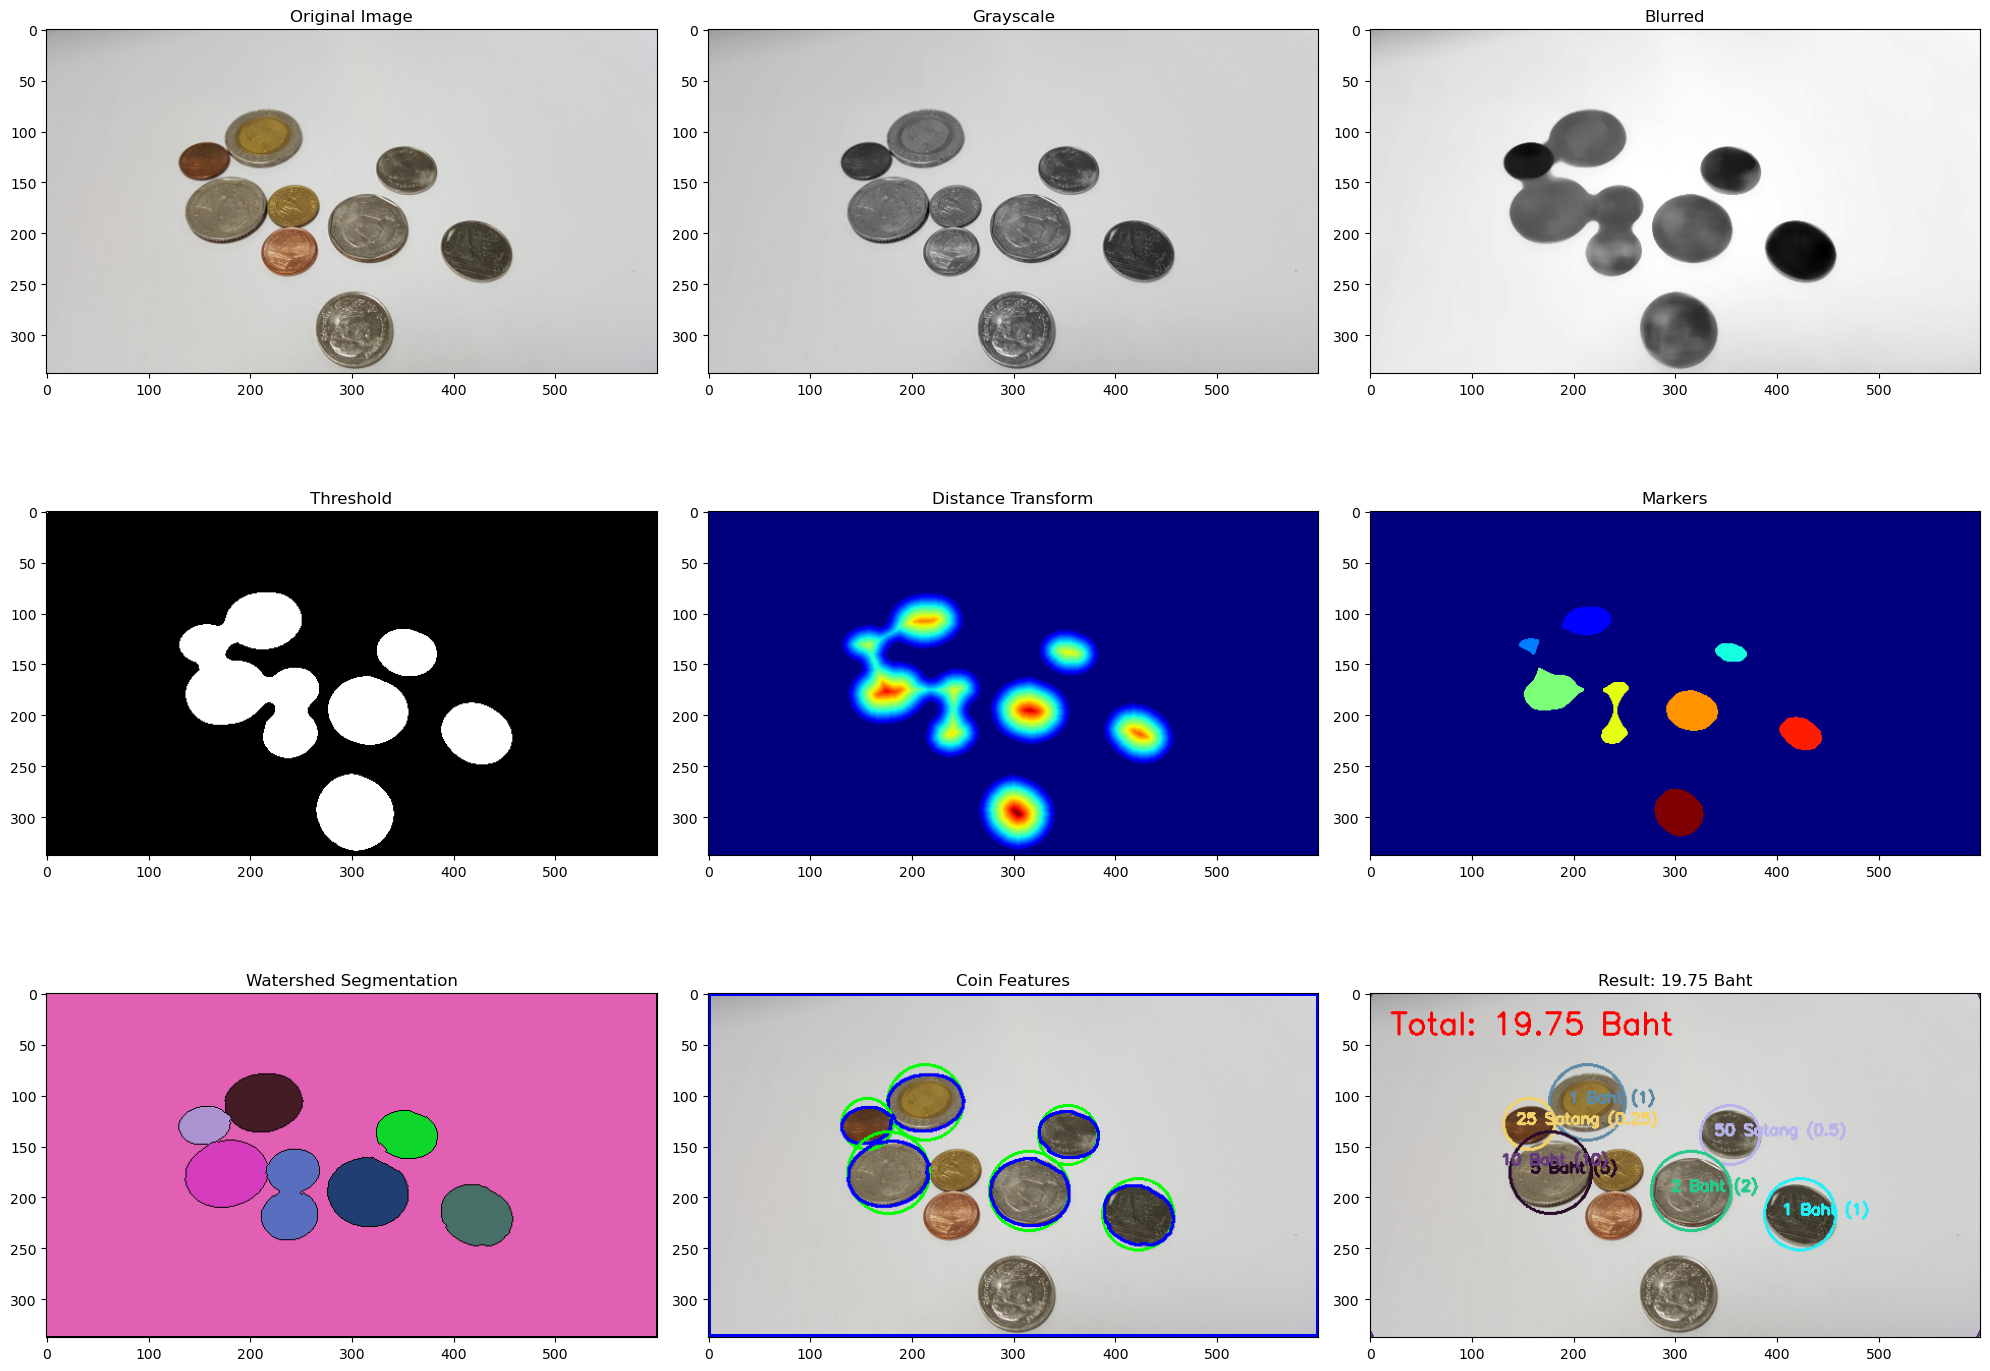

มูลค่ารวม: 19.75 บาท


In [29]:
# สร้าง instance ของ ThaiCoinCounter
coin_counter = ThaiCoinCounter()

# ทดสอบกับรูปภาพที่ให้มา
image_path = "assets/Lab7-SampleCoins.jpg"  # เปลี่ยนเป็นพาธของรูปภาพตัวอย่าง

# ประมวลผลรูปภาพและแสดงขั้นตอนทั้งหมด
result_image, total = coin_counter.process_image(image_path, visualize=True, show_steps=True)

print(f"มูลค่ารวม: {total:.2f} บาท")